In [10]:
import pandas as pd
import altair as alt
alt.renderers.set_embed_options(theme='dark')
pd.set_option('display.max_colwidth', None)

# Analysis & Charts

In [11]:
def claim(claim_hash):
    try:
        df_claim = pd.read_json(
            f"https://api.flipsidecrypto.com/api/v2/queries/{claim_hash}/data/latest",
            convert_dates=["BLOCK_TIMESTAMP"],
        )
    except Exception as e:
        print(e)
        return 
    return df_claim

In [66]:
class DataProvider:    
    
    def __init__(self):
        self.lock234 = '9f7cf9ef-f7eb-45b5-92e2-dccf12d56d05'
        self.exit234 = '94411e01-3592-47c4-8964-c0611c1ece7a'
        self.lock5 = 'd76eb662-4dee-4e5e-b5f4-20de7b6f7de0'
        self.exit5 = '6aff5bf8-ceb3-4744-a1fe-6277e54442bd'
        self.pools = {'No LP':'No LP','-1':'No LP','1':'OSMO/ATOM',
                               '604':'STARS/OSMO',
                               '674':'DAI/OSMO',
                               '648':'PSTAKE/OSMO',
                               '3':'AKT/OSMO',
                               '704':'wETH/OSMO',
                               '605':'HUAHUA/OSMO',
                               '678':'USDC/OSMO',
                               '601':'CMDX/OSMO',
                               '560':'UST/OSMO',
                               '561':'LUNA/UST',
                               '562':'LUNA/OSMO',
                               '577':'XKI/OSMO',
                               '690':'MNTL/OSMO'}
    
    def get_lock(self):
        df = claim(self.lock234).append(claim(self.lock5))
        df.columns = ['pool_id','day','gamma_tokens']
        return df.groupby(['pool_id','day']).gamma_tokens.sum().reset_index()
    
    def get_exit(self):
        df = claim(self.exit234).append(claim(self.exit5))
        df.columns = ['pool_id','day','gamma_tokens']
        return df.groupby(['pool_id','day']).gamma_tokens.sum().reset_index()
   

In [82]:
dp = DataProvider()

In [83]:
df = dp.get_lock()
df

,pool_id,day,gamma_tokens
0,1,2022-01-31 00:00:00.000,2.421003e+04
1,1,2022-02-01 00:00:00.000,3.445742e+06
2,1,2022-02-02 00:00:00.000,1.072554e+06
3,1,2022-02-03 00:00:00.000,1.683169e+06
4,1,2022-02-04 00:00:00.000,1.239656e+06
...,...,...,...
7297,690,2022-05-18 00:00:00.000,3.994405e+02
7298,704,2022-05-15 00:00:00.000,1.160180e+04
7299,704,2022-05-16 00:00:00.000,1.003431e+04
7300,704,2022-05-17 00:00:00.000,5.492825e+03


In [84]:
lock_ = df.pivot(index='day', values='gamma_tokens', columns='pool_id').fillna(0)
lock_

pool_id,1,2,3,4,5,6,7,8,9,10,...,661,662,669,670,674,678,679,681,690,704
day,,,,,,,,,,,,,,,,,,,,,
2022-01-31 00:00:00.000,2.421003e+04,2.219797e+06,3692.237780,0.000000,0.000000e+00,0.000000e+00,1.170115e+02,9704.358611,4.520555e+04,2.921844e+03,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-01 00:00:00.000,3.445742e+06,4.151646e+06,25196.953963,3256.262892,5.438107e+07,2.109386e+07,3.559258e+05,57739.875953,1.365087e+06,3.708716e+06,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-02 00:00:00.000,1.072554e+06,5.489794e+06,231486.939873,6431.760351,2.074842e+06,2.798982e+05,4.364660e+05,57658.148458,3.680783e+05,1.182723e+06,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-03 00:00:00.000,1.683169e+06,6.561718e+06,440786.191184,1814.165134,3.485804e+06,3.119679e+06,5.081737e+05,113472.411858,1.502475e+06,1.242311e+06,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-04 00:00:00.000,1.239656e+06,2.034170e+06,231835.112074,148588.041815,9.152947e+05,9.985338e+05,3.476603e+06,52524.901138,2.395294e+05,8.365160e+05,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-14 00:00:00.000,9.138503e+06,1.655280e+06,36020.772711,4.809224,3.476468e+03,0.000000e+00,4.248361e+05,50539.084499,1.640739e+06,1.925395e+06,...,0.0,113.493497,117.304913,5557.742117,0.000000,1156.475600,0.170254,38416.815925,398.782431,0.000000
2022-05-15 00:00:00.000,1.532465e+06,4.296023e+05,195410.388737,0.000000,4.471046e+04,0.000000e+00,8.712813e+05,50155.629996,1.889357e+06,5.487920e+05,...,0.0,60.196730,107.256062,14796.433584,36710.933757,57424.734151,0.076400,103.594632,556.101854,11601.799761
2022-05-16 00:00:00.000,4.316664e+05,5.779893e+04,126059.568124,1502.132309,2.779328e+04,0.000000e+00,1.595524e+06,0.000000,6.296783e+05,1.505294e+05,...,0.0,17.394363,36.827213,355883.608354,62258.675099,161336.117798,0.000000,4582.733878,203345.337411,10034.312994


In [85]:
df = dp.get_exit()
df

,pool_id,day,gamma_tokens
0,1,2022-01-31 00:00:00.000,2.020054e+04
1,1,2022-02-01 00:00:00.000,1.106062e+06
2,1,2022-02-02 00:00:00.000,4.211405e+05
3,1,2022-02-03 00:00:00.000,4.995707e+05
4,1,2022-02-04 00:00:00.000,1.109020e+06
...,...,...,...
8205,709,2022-05-16 00:00:00.000,9.900000e-01
8206,711,2022-05-15 00:00:00.000,9.900000e+01
8207,711,2022-05-16 00:00:00.000,1.023018e+00
8208,711,2022-05-17 00:00:00.000,6.303722e-03


In [104]:
exit_ = df.pivot(index='day', values='gamma_tokens', columns='pool_id').fillna(0)
delta = lock_.append(-exit_)
delta = delta.groupby(['day']).sum().reset_index()
delta

pool_id,day,1,2,3,4,5,6,7,8,9,...,701,702,703,704,705,706,708,709,711,712
0,2022-01-31 00:00:00.000,4.009484e+03,2.219797e+06,3692.237780,-243454.117894,-1.282223e+07,-1.535634e+06,1.170115e+02,9.704359e+03,-2.855767e+05,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00000
1,2022-02-01 00:00:00.000,2.339680e+06,-3.551772e+06,-526652.111609,-521793.424556,-9.756064e+07,-5.098935e+07,-1.248479e+05,-2.069992e+07,-1.542265e+07,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00000
2,2022-02-02 00:00:00.000,6.514133e+05,4.207681e+06,-5379.292949,-35180.804690,-1.832683e+08,-3.232908e+07,-3.028815e+06,5.765815e+04,-2.009579e+07,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00000
3,2022-02-03 00:00:00.000,1.183598e+06,3.495341e+06,-713265.051024,-145424.044618,-1.225045e+08,-1.476917e+08,3.173531e+05,9.371817e+04,-1.426317e+07,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00000
4,2022-02-04 00:00:00.000,1.306357e+05,1.049496e+06,63235.118416,38968.032821,-1.076982e+08,-1.068715e+09,2.719630e+06,-6.499637e+05,-1.979131e+07,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2022-05-14 00:00:00.000,5.945937e+06,-9.903883e+06,-3822.608215,-1421.450965,-2.116450e+07,-1.002226e+04,3.747485e+05,5.053908e+04,-1.188199e+06,...,-207.653569,-8.492052,0.0,-14.207927,0.0,0.000000,0.000000,0.00,0.000000,0.00000
104,2022-05-15 00:00:00.000,-9.684500e+05,3.811613e+05,57751.851848,-62221.514886,-2.854790e+07,-3.482144e+05,6.896168e+05,-4.185717e+03,-2.542207e+06,...,-201.403830,0.000000,0.0,11567.410674,0.0,0.000000,-20786.101828,-99.00,-99.000000,0.00000
105,2022-05-16 00:00:00.000,-1.921685e+07,-4.497544e+06,125211.872288,-6433.161227,-5.673783e+06,-2.301519e+06,1.595524e+06,0.000000e+00,-2.773958e+07,...,-45.801966,0.000000,0.0,9975.804524,0.0,-14.348432,-2.246101,-0.99,-1.023018,0.00000
106,2022-05-17 00:00:00.000,-3.109464e+06,1.256231e+05,502835.388936,-6846.039018,-8.517045e+06,-3.134604e+07,3.763056e+05,5.009554e+04,-2.591163e+06,...,-10.701984,0.000000,0.0,5492.385699,0.0,-1.478027,0.000000,0.00,-0.006304,-827.73366


In [105]:
delta_cumsum = delta.sort_values(by='day').cumsum()

<AxesSubplot:>

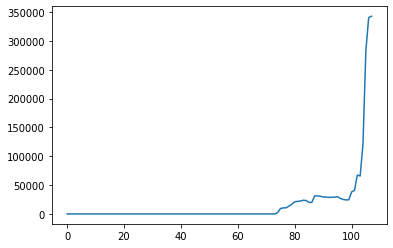

In [106]:
delta_cumsum[678].plot(kind='line')

In [108]:
delta_cumsum.to_json('../data/delta_cumsum.json')